# Capstone Project
● Select a dataset. ​Note​:
Once you’ve selected a dataset please make sure to check it with your mentor before starting.

● Create the report as described in this task.

● When you submit your report for review, also book a call with your mentor so that you can present your report and findings to your mentor.

### Importing the relevent libraries to be used to for this dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS 

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read in the fifa-18 dataset into pandas dataframe

fifa_df = pd.read_csv('fifa-18.csv')
fifa_df.head()

C:\Users\Gaokaelwe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano_Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real_Madrid_CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L._Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC_Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris_Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L._Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC_Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M._Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC_Bayern_Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fifa_df.shape

(17981, 75)

In [4]:
fifa_df.columns

Index(['id', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball_control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free_kick_accuracy', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'Heading_accuracy', 'Interceptions',
       'Jumping', 'Long_passing', 'Long_shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short_passing', 'Shot_power',
       'Sliding_tackle', 'Sprint_speed', 'Stamina', 'Standing_tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred_Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

### Data Cleaning

In [5]:
droped_columns = ['Photo', 'Flag', 'Club_Logo', 'Acceleration', 'Curve', 'Free_kick_accuracy', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes', 'Heading_accuracy', 'Interceptions', 'Jumping', 'Long_passing', 'Long_shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short_passing', 'Shot_power', 'Sliding_tackle', 'Sprint_speed', 'Stamina', 'Standing_tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred_Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']

# Using DataFrame.drop to drop unneeded names in a list *droped_columns*

fifa_df.drop(droped_columns, axis = 1, inplace = True)
display(fifa_df.head(8))
display(fifa_df.shape)

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Dribbling,Finishing
0,0,Cristiano_Ronaldo,32,Portugal,94,94,Real_Madrid_CF,95.5M,565K,2228,63,89,63,93,95,85,91,94
1,1,L._Messi,30,Argentina,93,93,FC_Barcelona,105M,565K,2154,48,90,95,95,96,77,97,95
2,2,Neymar,25,Brazil,92,94,Paris_Saint-Germain,123M,280K,2100,56,96,82,95,92,75,96,89
3,3,L._Suárez,30,Uruguay,92,92,FC_Barcelona,97M,510K,2291,78,86,60,91,83,77,86,94
4,4,M._Neuer,31,Germany,92,92,FC_Bayern_Munich,61M,230K,1493,29,52,35,48,70,15,30,13
5,5,R._Lewandowski,28,Poland,91,91,FC_Bayern_Munich,92M,355K,2143,80,78,80,89,87,62,85,91
6,6,De_Gea,26,Spain,90,92,Manchester_United,64.5M,215K,1458,38,60,43,42,64,17,18,13
7,7,E._Hazard,26,Belgium,90,91,Chelsea,90.5M,295K,2096,54,93,91,92,87,80,93,83


(17981, 18)

In [6]:
fifa_df.columns

Index(['id', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Aggression', 'Agility', 'Balance',
       'Ball_control', 'Composure', 'Crossing', 'Dribbling', 'Finishing'],
      dtype='object')

In [7]:
fifa_df.isnull().sum()

id                0
Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club            248
Value             0
Wage              0
Special           0
Aggression        0
Agility           0
Balance           0
Ball_control      0
Composure         0
Crossing          0
Dribbling         0
Finishing         0
dtype: int64

use Heatmap to clearly see the missing values

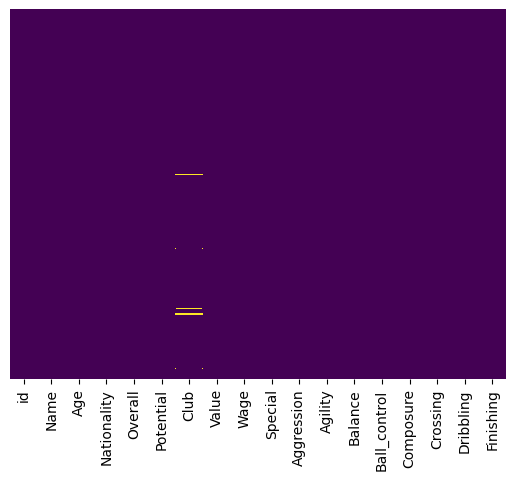

In [8]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(fifa_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

*The Club column is the only column with missing values after dropping the un-needed columns*

In [9]:
fifa_df.dropna(subset = ['Club'], inplace=True)

In [10]:
fifa_df.isnull().sum()

id              0
Name            0
Age             0
Nationality     0
Overall         0
Potential       0
Club            0
Value           0
Wage            0
Special         0
Aggression      0
Agility         0
Balance         0
Ball_control    0
Composure       0
Crossing        0
Dribbling       0
Finishing       0
dtype: int64

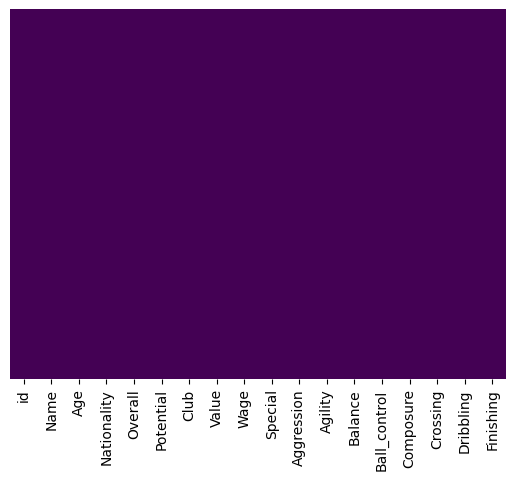

In [11]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(fifa_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [12]:
fifa_df.dtypes

id               int64
Name            object
Age              int64
Nationality     object
Overall          int64
Potential        int64
Club            object
Value           object
Wage            object
Special          int64
Aggression      object
Agility         object
Balance         object
Ball_control    object
Composure       object
Crossing        object
Dribbling       object
Finishing       object
dtype: object

In [13]:
fifa_df.columns

Index(['id', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Aggression', 'Agility', 'Balance',
       'Ball_control', 'Composure', 'Crossing', 'Dribbling', 'Finishing'],
      dtype='object')

*As one can observe above the columns data types need to be adjusted to float and integer.*

In [14]:
lst = ['Value', 'Wage']
for x in lst:
    fifa_df[x] = (fifa_df[x].replace(r'[KM]+$', '', regex=True).astype(float) *
                   fifa_df[x].str.extract(r'[\d\.]+([KM]+)', expand=False)
                   .fillna(1)
                   .replace(['K','M'], [10**3, 10**6]).astype(int))

In [15]:
fifa_df.dtypes

id                int64
Name             object
Age               int64
Nationality      object
Overall           int64
Potential         int64
Club             object
Value           float64
Wage            float64
Special           int64
Aggression       object
Agility          object
Balance          object
Ball_control     object
Composure        object
Crossing         object
Dribbling        object
Finishing        object
dtype: object

In [16]:
fifa_df

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Dribbling,Finishing
0,0,Cristiano_Ronaldo,32,Portugal,94,94,Real_Madrid_CF,95500000.0,565000.0,2228,63,89,63,93,95,85,91,94
1,1,L._Messi,30,Argentina,93,93,FC_Barcelona,105000000.0,565000.0,2154,48,90,95,95,96,77,97,95
2,2,Neymar,25,Brazil,92,94,Paris_Saint-Germain,123000000.0,280000.0,2100,56,96,82,95,92,75,96,89
3,3,L._Suárez,30,Uruguay,92,92,FC_Barcelona,97000000.0,510000.0,2291,78,86,60,91,83,77,86,94
4,4,M._Neuer,31,Germany,92,92,FC_Bayern_Munich,61000000.0,230000.0,1493,29,52,35,48,70,15,30,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A._Kelsey,17,England,46,63,Scunthorpe_United,50000.0,1000.0,755,16,38,26,12,23,14,12,5
17977,17977,B._Richardson,47,England,46,46,Wycombe_Wanderers,0.0,1000.0,832,44,35,44,22,44,11,11,11
17978,17978,J._Young,17,Scotland,46,61,Swindon_Town,60000.0,1000.0,1194,26,60,77,41,50,28,37,47
17979,17979,J._Lundstram,18,England,46,64,Crewe_Alexandra,60000.0,1000.0,1302,46,58,74,43,45,34,41,32


### Missing Data

In [17]:
lst = ['Aggression', 'Agility', 'Balance', 'Ball_control', 'Composure', 'Crossing','Dribbling','Finishing']
for k in lst:
    fifa_df[k] = pd.to_numeric(fifa_df[k], errors='coerce')



In [18]:
fifa_df.dtypes

id                int64
Name             object
Age               int64
Nationality      object
Overall           int64
Potential         int64
Club             object
Value           float64
Wage            float64
Special           int64
Aggression      float64
Agility         float64
Balance         float64
Ball_control    float64
Composure       float64
Crossing        float64
Dribbling       float64
Finishing       float64
dtype: object

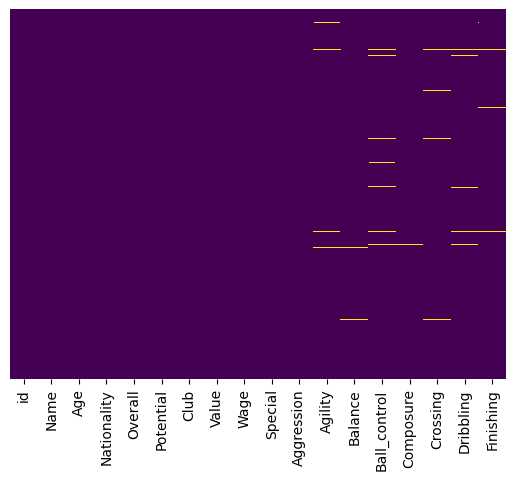

In [19]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(fifa_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [20]:
fifa_df.isnull().sum()

id                0
Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Wage              0
Special           0
Aggression       68
Agility          71
Balance          57
Ball_control    140
Composure        94
Crossing         96
Dribbling       129
Finishing       114
dtype: int64

In [21]:
fifa_df.shape

(17733, 18)

*This is a fairly large dataset so decided to delete the rows with missing values values*

*You can use to_numeric and get NaN where there is problematic value*

*Performed imputation by replacing the nan values with the mean of each column*

In [22]:
lst_nan = ['Aggression', 'Agility', 'Balance', 'Ball_control', 'Composure', 'Crossing','Dribbling','Finishing']
for i in lst_nan:

    fifa_df_mean = fifa_df[i].astype(float).mean(axis = 0)
    fifa_df[i].replace(np.nan, fifa_df_mean, inplace = True)

In [23]:
fifa_df.isnull().sum()

id              0
Name            0
Age             0
Nationality     0
Overall         0
Potential       0
Club            0
Value           0
Wage            0
Special         0
Aggression      0
Agility         0
Balance         0
Ball_control    0
Composure       0
Crossing        0
Dribbling       0
Finishing       0
dtype: int64

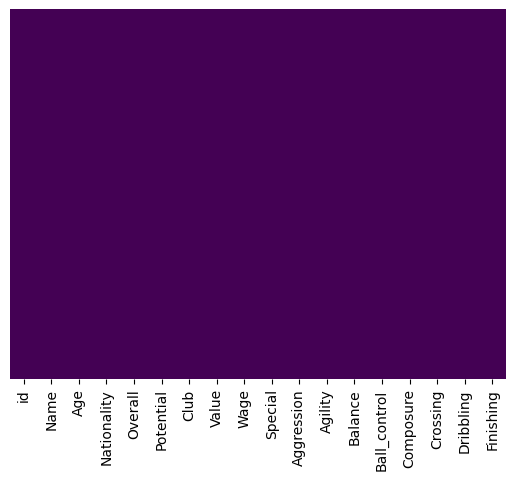

In [24]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(fifa_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [25]:
fifa_df.head()

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Dribbling,Finishing
0,0,Cristiano_Ronaldo,32,Portugal,94,94,Real_Madrid_CF,95500000.0,565000.0,2228,63.0,89.0,63.0,93.0,95.0,85.0,91.0,94.0
1,1,L._Messi,30,Argentina,93,93,FC_Barcelona,105000000.0,565000.0,2154,48.0,90.0,95.0,95.0,96.0,77.0,97.0,95.0
2,2,Neymar,25,Brazil,92,94,Paris_Saint-Germain,123000000.0,280000.0,2100,56.0,96.0,82.0,95.0,92.0,75.0,96.0,89.0
3,3,L._Suárez,30,Uruguay,92,92,FC_Barcelona,97000000.0,510000.0,2291,78.0,86.0,60.0,91.0,83.0,77.0,86.0,94.0
4,4,M._Neuer,31,Germany,92,92,FC_Bayern_Munich,61000000.0,230000.0,1493,29.0,52.0,35.0,48.0,70.0,15.0,30.0,13.0


*As one could see from the Heatmap and isnull().sum() methods the dataset is now clean and Exploratory data analysis can be performed.*

### DATA STORIES AND VISUALIZATIONS

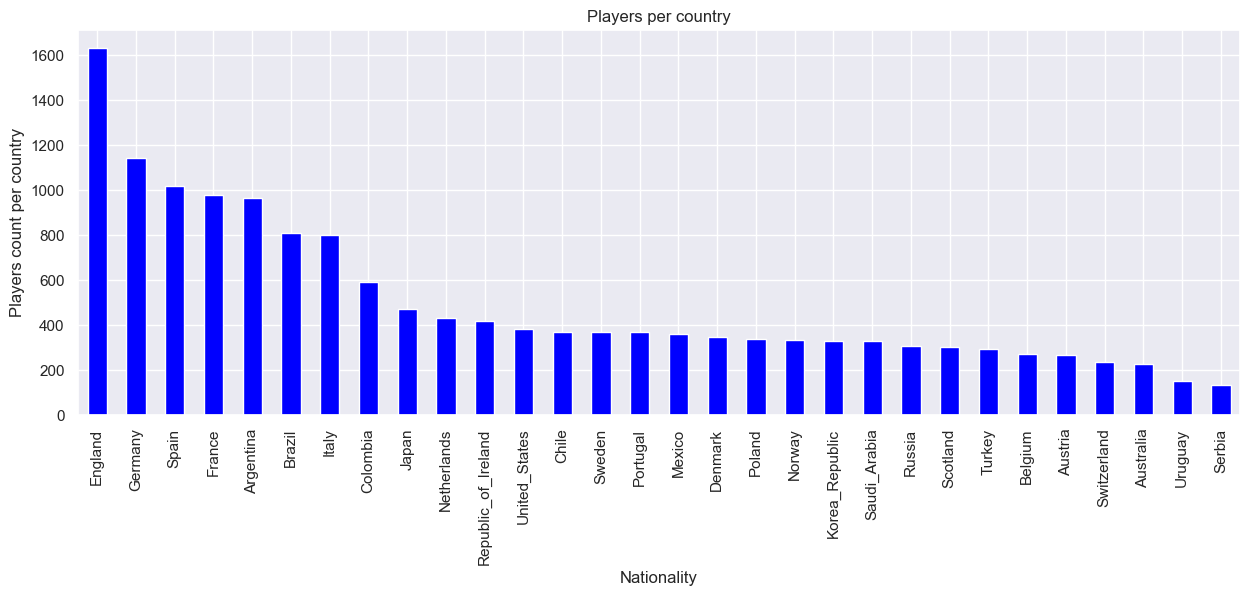

In [26]:
plt.style.use('default')
sns.set(style = 'darkgrid')

fifa_df.Nationality.value_counts().nlargest(30).plot(kind='bar', color = 'blue', figsize=(15,5))

plt.title("Players per country")
plt.ylabel('Players count per country')
plt.xlabel('Nationality')
plt.show()

*It can be observed that many players in the dataset are playing in England*

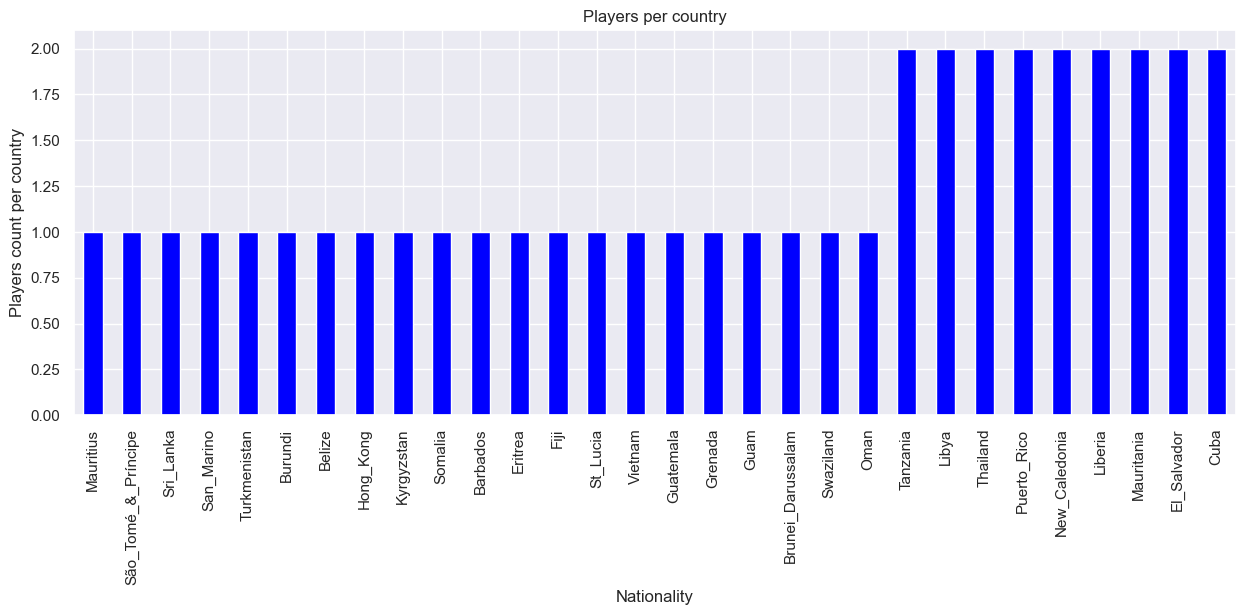

In [27]:
plt.style.use('default')
sns.set(style = 'darkgrid')

fifa_df.Nationality.value_counts().nsmallest(30).plot(kind='bar', color = 'blue', figsize=(15,5))

plt.title('Players per country')
plt.ylabel('Players count per country')
plt.xlabel('Nationality')
plt.show()

*It can be observed that most of the countries with least number of players are from mostly lower ranked FIFA countries in the world. lowest 30 ountries with low number of players have between one and two in the dataset, with mostly one player*

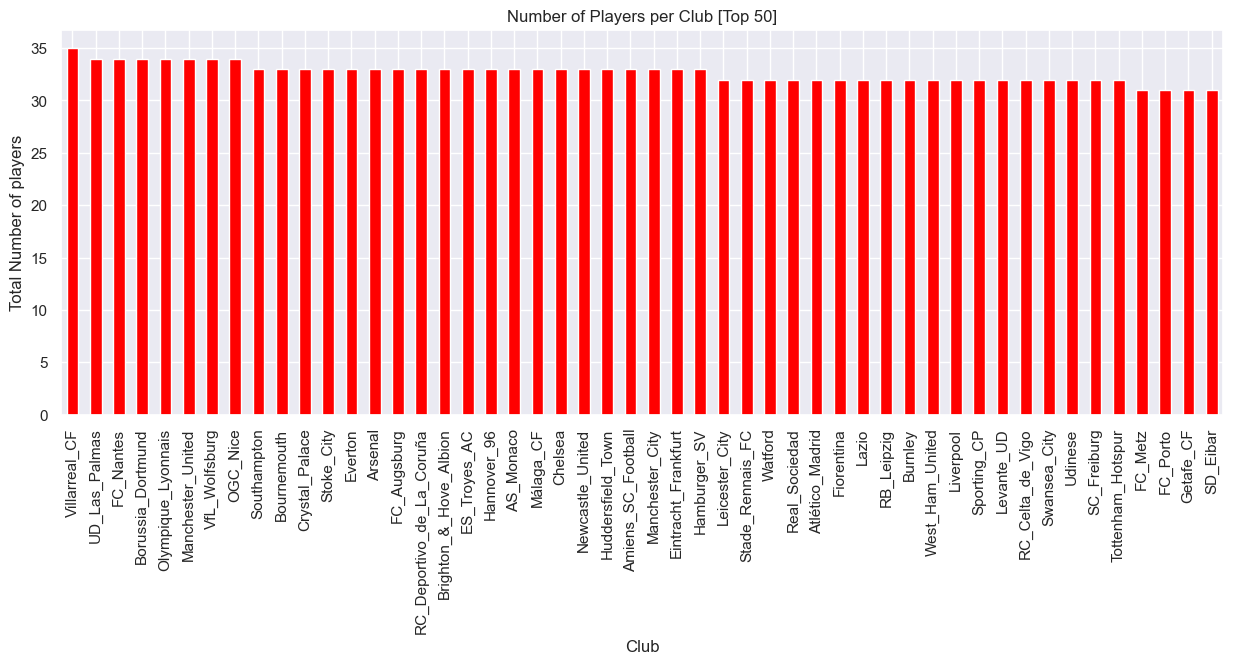

In [28]:
plt.style.use('default')
sns.set(style = 'darkgrid')

fifa_df.Club.value_counts().nlargest(50).plot(kind='bar', color = 'red', figsize=(15,5))

plt.title("Number of Players per Club [Top 50]")
plt.ylabel('Total Number of players')
plt.xlabel('Club')
plt.show()

*Villarreal_CF has the highest number of players registered in its records with 35 players*

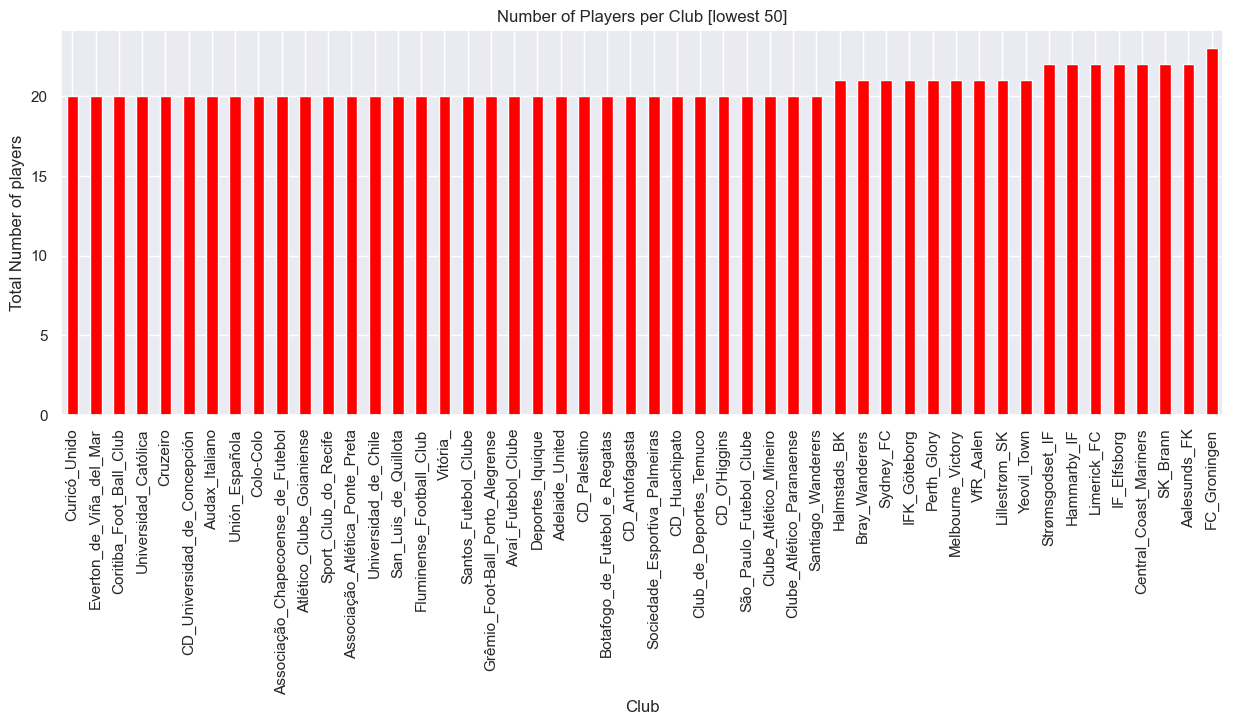

In [29]:
plt.style.use('default')
sns.set(style = 'darkgrid')

fifa_df.Club.value_counts().nsmallest(50).plot(kind='bar', color = 'red', figsize=(15,5))

plt.title("Number of Players per Club [lowest 50]")
plt.ylabel('Total Number of players')
plt.xlabel('Club')
plt.show()

*Fluminense_Football_club has the lowest number of players in its records*

In [30]:
fifa_df.head()

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Dribbling,Finishing
0,0,Cristiano_Ronaldo,32,Portugal,94,94,Real_Madrid_CF,95500000.0,565000.0,2228,63.0,89.0,63.0,93.0,95.0,85.0,91.0,94.0
1,1,L._Messi,30,Argentina,93,93,FC_Barcelona,105000000.0,565000.0,2154,48.0,90.0,95.0,95.0,96.0,77.0,97.0,95.0
2,2,Neymar,25,Brazil,92,94,Paris_Saint-Germain,123000000.0,280000.0,2100,56.0,96.0,82.0,95.0,92.0,75.0,96.0,89.0
3,3,L._Suárez,30,Uruguay,92,92,FC_Barcelona,97000000.0,510000.0,2291,78.0,86.0,60.0,91.0,83.0,77.0,86.0,94.0
4,4,M._Neuer,31,Germany,92,92,FC_Bayern_Munich,61000000.0,230000.0,1493,29.0,52.0,35.0,48.0,70.0,15.0,30.0,13.0


In [31]:
# The dataset has 647 different clubs

display("The fifa-18 dataset has " + str(len(fifa_df.Club.unique())) + " Clubs")
display(fifa_df.Club.unique())

'The fifa-18 dataset has 647 Clubs'

array(['Real_Madrid_CF', 'FC_Barcelona', 'Paris_Saint-Germain',
       'FC_Bayern_Munich', 'Manchester_United', 'Chelsea', 'Juventus',
       'Manchester_City', 'Arsenal', 'Atlético_Madrid',
       'Borussia_Dortmund', 'Milan', 'Tottenham_Hotspur', 'Napoli',
       'Inter', 'Liverpool', 'Roma', 'Beşiktaş_JK', 'AS_Monaco',
       'Bayer_04_Leverkusen', 'AS_Saint-Étienne',
       'Athletic_Club_de_Bilbao', '1._FC_Köln', 'Villarreal_CF',
       'FC_Schalke_04', 'Olympique_de_Marseille', 'Atalanta',
       'RB_Leipzig', 'Real_Sociedad', 'Torino', 'Sporting_CP',
       'Leicester_City', 'Southampton', 'FC_Porto', 'UD_Las_Palmas',
       'Olympique_Lyonnais', 'Lazio', 'Genoa', 'Everton',
       'RC_Celta_de_Vigo', 'Valencia_CF', 'Sevilla_FC', 'Toronto_FC',
       'Borussia_Mönchengladbach', 'SL_Benfica', 'RCD_Espanyol',
       'OGC_Nice', 'Spartak_Moscow', 'Swansea_City', 'Sassuolo',
       'TSG_1899_Hoffenheim', 'Stoke_City', 'Shakhtar_Donetsk',
       'West_Ham_United', 'SV_Werder_Bremen',

In [32]:
# The dataset has 164 different countries

display("The fifa-18 dataset has " + str(len(fifa_df.Nationality.unique())) + " countries")
display(fifa_df.Nationality.unique())

'The fifa-18 dataset has 164 countries'

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Poland',
       'Spain', 'Belgium', 'Chile', 'Croatia', 'Wales', 'Italy',
       'Slovenia', 'France', 'Gabon', 'Sweden', 'Netherlands', 'Denmark',
       'Slovakia', 'England', 'Colombia', 'Austria', 'Greece',
       'Czech_Republic', 'Costa_Rica', 'Armenia', 'Bosnia_Herzegovina',
       'Ivory_Coast', 'Senegal', 'Switzerland', 'Morocco', 'Guinea',
       'Egypt', 'Algeria', 'Cameroon', 'Serbia', 'Japan', 'Turkey',
       'Ecuador', 'Montenegro', 'Korea_Republic', 'Kenya', 'Iceland',
       'Mexico', 'Norway', 'DR_Congo', 'Ukraine', 'Russia', 'Finland',
       'Republic_of_Ireland', 'United_States', 'Venezuela', 'Ghana',
       'Uzbekistan', 'Nigeria', 'Canada', 'Paraguay', 'Romania',
       'Albania', 'Burkina_Faso', 'Cape_Verde', 'New_Zealand',
       'Northern_Ireland', 'Syria', 'Peru', 'Scotland', 'Bulgaria',
       'Angola', 'Australia', 'South_Africa', 'Jamaica', 'Tunisia',
       'Mozambique', 'Iran', 'Mali', 'Cub

In [33]:
fifa_df.columns

Index(['id', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Aggression', 'Agility', 'Balance',
       'Ball_control', 'Composure', 'Crossing', 'Dribbling', 'Finishing'],
      dtype='object')

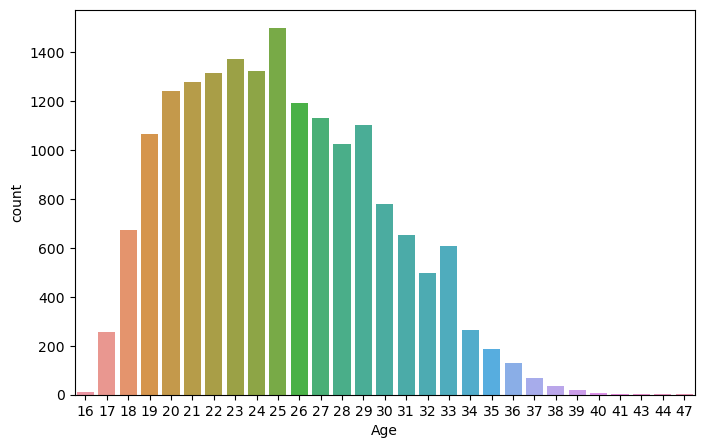

In [34]:
plt.style.use('default')
plt.figure(figsize = (8,5))
sns.countplot(fifa_df['Age'])

plt.show()

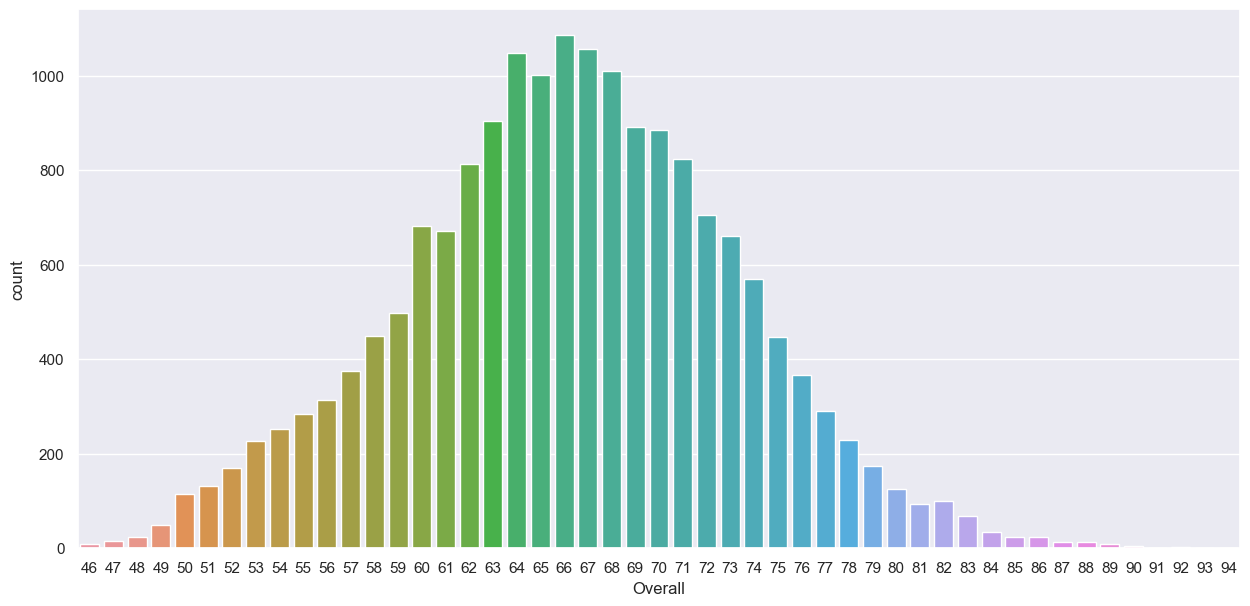

In [35]:
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (15,7))
sns.countplot(fifa_df['Overall'])

plt.show()

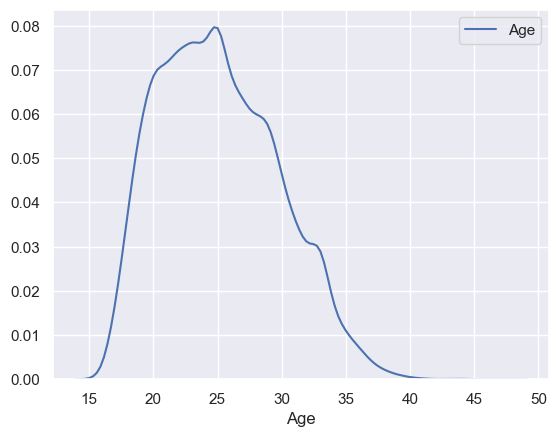

In [36]:
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.xlabel('Age')
sns.kdeplot(fifa_df.Age)
plt.show()

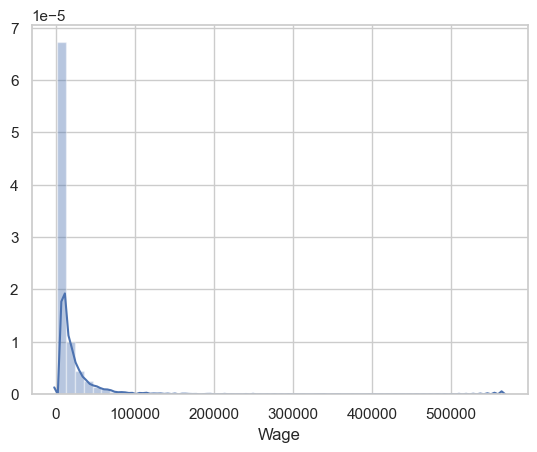

In [37]:

plt.style.use('default')
sns.set(style = 'whitegrid')
# plt.figure(figsize = (15,8))
sns.distplot(fifa_df['Wage'])
plt.show()

In [38]:
# pick a smaller set of columns like we saw earlier for us to get started.
fifa_new_df = fifa_df[['Name', 'Age', 'Nationality', 'Club']]


*We want to see the youngest players in the data, we should sort players by their age. We can do that using the sort_values() function.*

In [39]:
print("Players sorted by age")
display(fifa_new_df.sort_values("Age").head(20))
print("\nDataset player average age: ")
display(fifa_new_df.Age.mean())

Players sorted by age


,Name,Age,Nationality,Club
10556,K._Pierie,16,Netherlands,SC_Heerenveen
15119,L._Geertruida,16,Netherlands,Feyenoord
15571,Javi_Vázquez,16,Spain,Sevilla_Atlético
17667,J._Hove,16,Norway,Sogndal
15968,E._Håland,16,Norway,Molde_FK
11397,A._Gomes,16,England,Manchester_United
17014,R._Strechie,16,Romania,F.B.C._Unione_Venezia
16116,M._Sprang,16,Germany,FSV_Zwickau
13733,E._Vignato,16,Italy,Chievo_Verona
15837,J._Romero,16,Argentina,Atlético_Tucumán



Dataset player average age: 


25.10940055264197

*Lets find the average age of players in each country. We can use groupby() along with mean() to achieve this.*

In [40]:
fifa_new_df.groupby("Nationality").mean().sort_values('Age').head(161)

,Age
Nationality,
Hong_Kong,17.0
Brunei_Darussalam,19.0
Swaziland,20.0
Liberia,21.5
China_PR,21.5
...,...
Turkmenistan,30.0
Barbados,30.0
Gibraltar,30.0


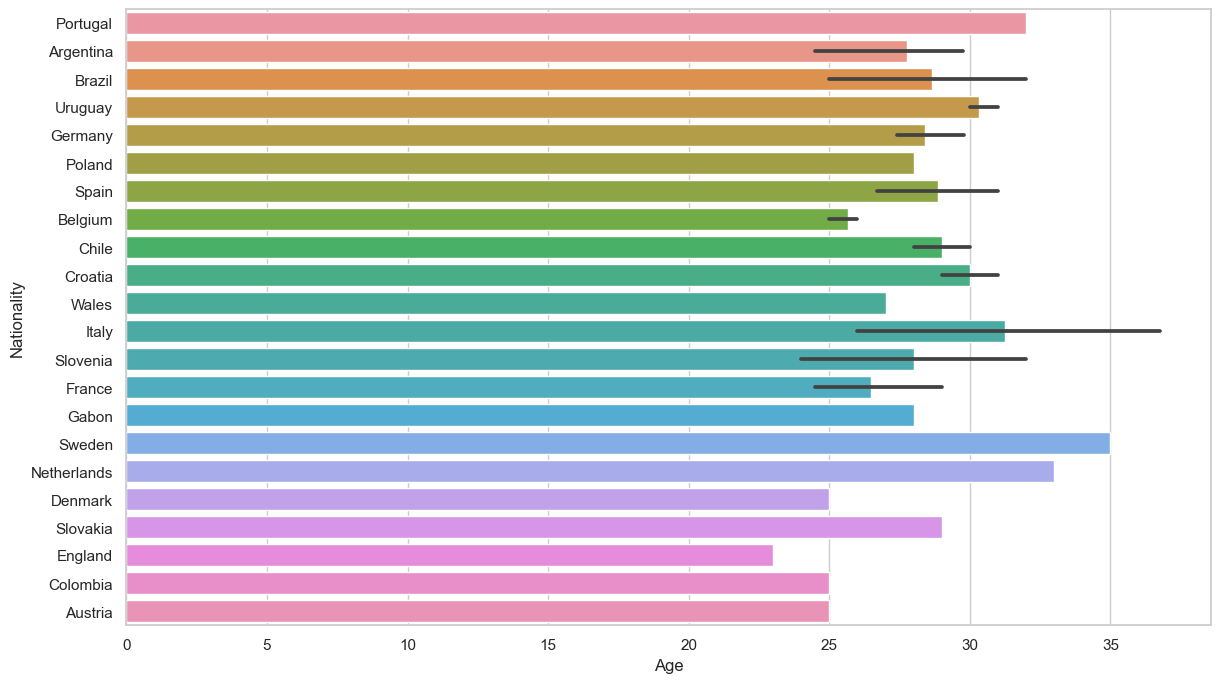

In [41]:

plt.style.use('default')
sns.set(style = 'whitegrid')
plt.figure(figsize = (14,8))

ax=sns.barplot(x = 'Age', y = 'Nationality', data = fifa_new_df.iloc[:50,])
plt.show()


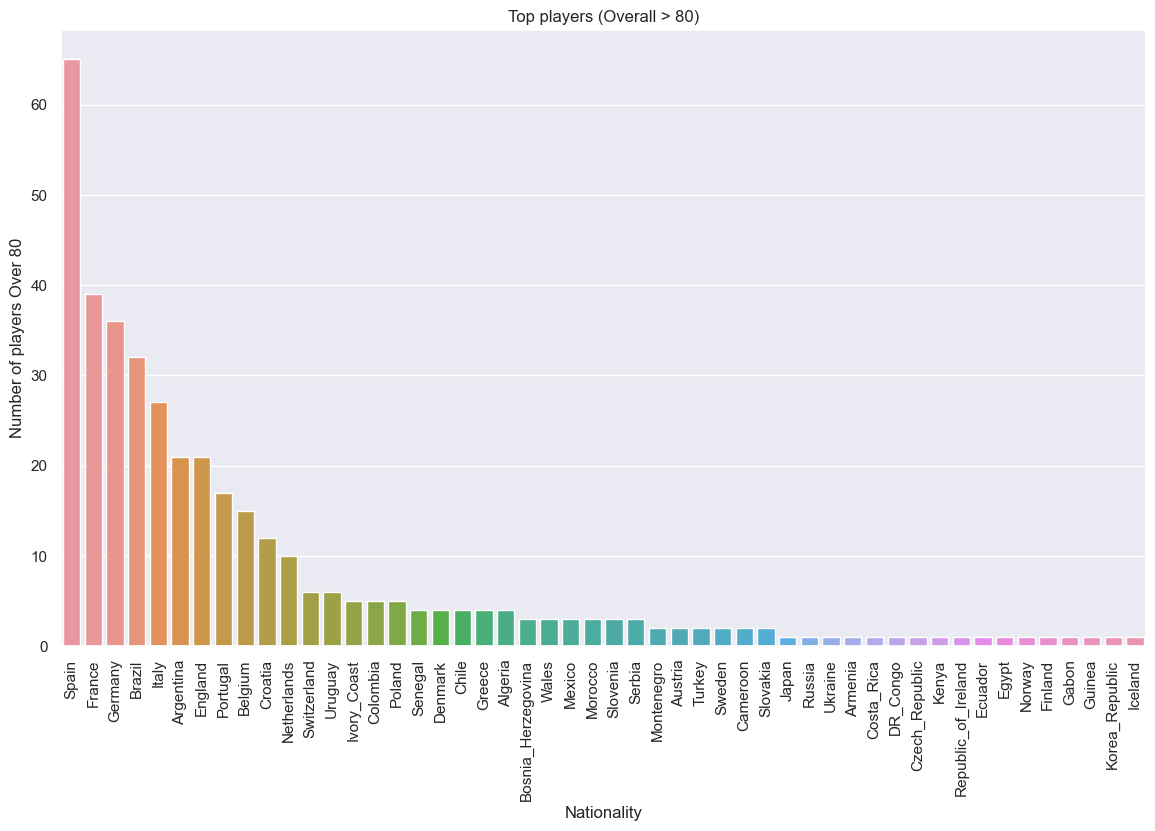

In [42]:
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (14,8))
cutoff = 80

players = fifa_df[fifa_df['Overall'] > cutoff]

grouped_players = fifa_df[fifa_df['Overall'] > cutoff].groupby('Nationality')

number_of_players = grouped_players.count()['Name'].sort_values(ascending = False)

ax = sns.countplot(x = 'Nationality', data = players, order = number_of_players.index)

ax.set_xticklabels(labels = number_of_players.index, rotation = 'vertical')
ax.set_ylabel('Number of players Over 80')
ax.set_xlabel('Nationality')
ax.set_title('Top players (Overall > %.i)' %cutoff)
plt.show()

In [43]:
# fifa_df.loc[:,['Value','Wage']].head(5)
fifa_df.describe()

,id,Age,Overall,Potential,Value,Wage,Special,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Dribbling,Finishing
count,17733.000000,17733.000000,17733.000000,17733.000000,1.773300e+04,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000
mean,9003.783229,25.109401,66.232786,71.211978,2.418750e+06,11708.453166,1594.386003,55.806227,63.383026,63.805216,58.129881,57.915415,49.749447,55.063054,45.253420
std,5196.902784,4.609863,7.001454,6.106766,5.383791e+06,23200.122784,271.931089,17.428692,14.763772,14.090228,16.727518,12.865079,18.395031,18.924551,19.387249
min,0.000000,16.000000,46.000000,46.000000,0.000000e+00,1000.000000,728.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,2.000000,2.000000
25%,4499.000000,21.000000,62.000000,67.000000,3.250000e+05,2000.000000,1449.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,48.000000,30.000000
50%,9017.000000,25.000000,66.000000,71.000000,7.000000e+05,4000.000000,1633.000000,58.000000,65.000000,66.000000,62.000000,60.000000,54.000000,60.000000,48.000000
75%,13505.000000,28.000000,71.000000,75.000000,2.100000e+06,12000.000000,1785.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,68.000000,61.000000
max,17980.000000,47.000000,94.000000,94.000000,1.230000e+08,565000.000000,2291.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,97.000000,95.000000


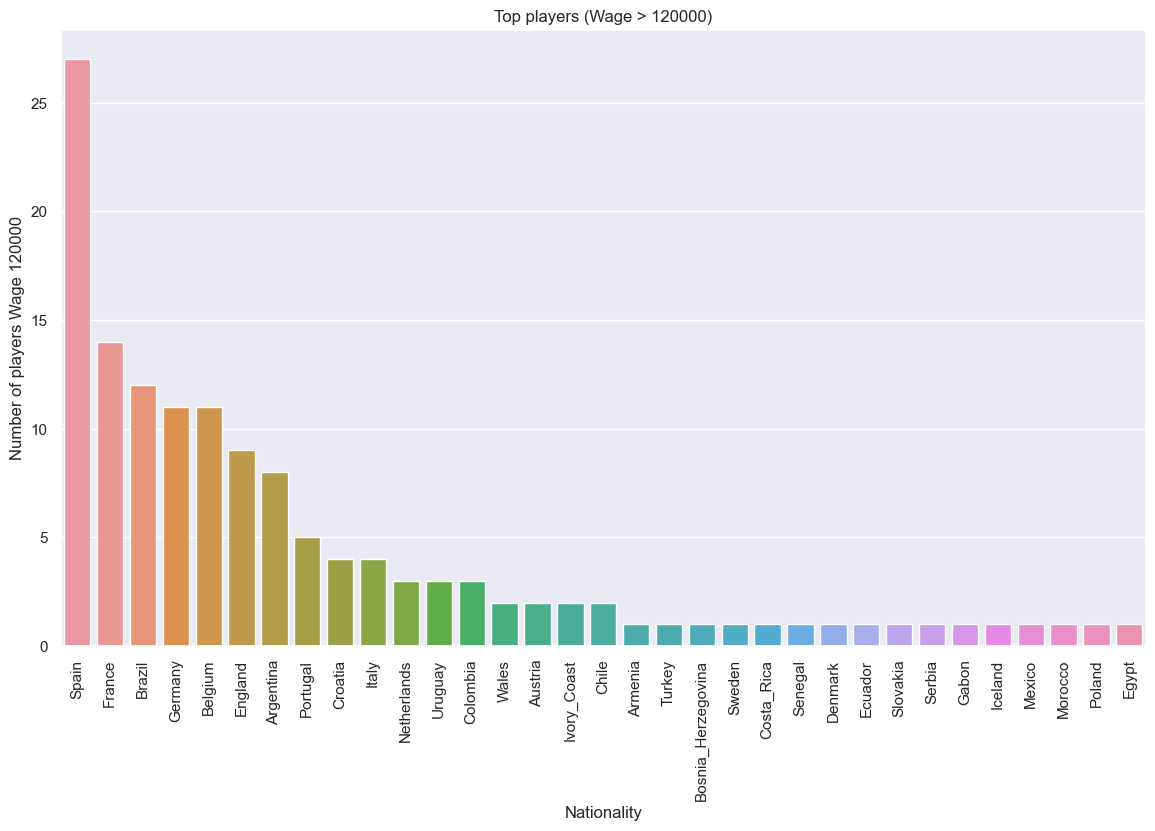

In [44]:
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (14,8))
cutoff = 120000

players = fifa_df[fifa_df['Wage'] > cutoff]

grouped_players = fifa_df[fifa_df['Wage'] > cutoff].groupby('Nationality')

number_of_players = grouped_players.count()['Name'].sort_values(ascending = False)

ax = sns.countplot(x = 'Nationality', data = players, order = number_of_players.index)

ax.set_xticklabels(labels = number_of_players.index, rotation = 'vertical')
ax.set_ylabel('Number of players Wage 120000')
ax.set_xlabel('Nationality')
ax.set_title('Top players (Wage > %.i)' %cutoff)
plt.show()

In [45]:
fifa_df.groupby("Nationality")["Wage"].nlargest(10).sort_values(ascending=False).head(10)


Nationality    
Portugal     0     565000.0
Argentina    1     565000.0
Uruguay      3     510000.0
Wales        15    370000.0
Poland       5     355000.0
Croatia      14    340000.0
Germany      8     340000.0
Argentina    16    325000.0
Spain        10    310000.0
Belgium      7     295000.0
Name: Wage, dtype: float64

In [46]:
fifa_df.head()

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Dribbling,Finishing
0,0,Cristiano_Ronaldo,32,Portugal,94,94,Real_Madrid_CF,95500000.0,565000.0,2228,63.0,89.0,63.0,93.0,95.0,85.0,91.0,94.0
1,1,L._Messi,30,Argentina,93,93,FC_Barcelona,105000000.0,565000.0,2154,48.0,90.0,95.0,95.0,96.0,77.0,97.0,95.0
2,2,Neymar,25,Brazil,92,94,Paris_Saint-Germain,123000000.0,280000.0,2100,56.0,96.0,82.0,95.0,92.0,75.0,96.0,89.0
3,3,L._Suárez,30,Uruguay,92,92,FC_Barcelona,97000000.0,510000.0,2291,78.0,86.0,60.0,91.0,83.0,77.0,86.0,94.0
4,4,M._Neuer,31,Germany,92,92,FC_Bayern_Munich,61000000.0,230000.0,1493,29.0,52.0,35.0,48.0,70.0,15.0,30.0,13.0


## *Scouts can analyze the following attributes  ['Potential', ''Balance', 'Ball_control', 'Composure', 'Finishing'] as guidance to finding good players based on Nationality*

*Compare the countries found with highest player Overall to each other.* 

*Find the highest ranked player per column by nationality.*

In [47]:
fifa_df.groupby("Nationality")["Overall"].nlargest(6).sort_values(ascending=False).head(6)


Nationality   
Portugal     0    94
Argentina    1    93
Uruguay      3    92
Germany      4    92
Brazil       2    92
Poland       5    91
Name: Overall, dtype: int64

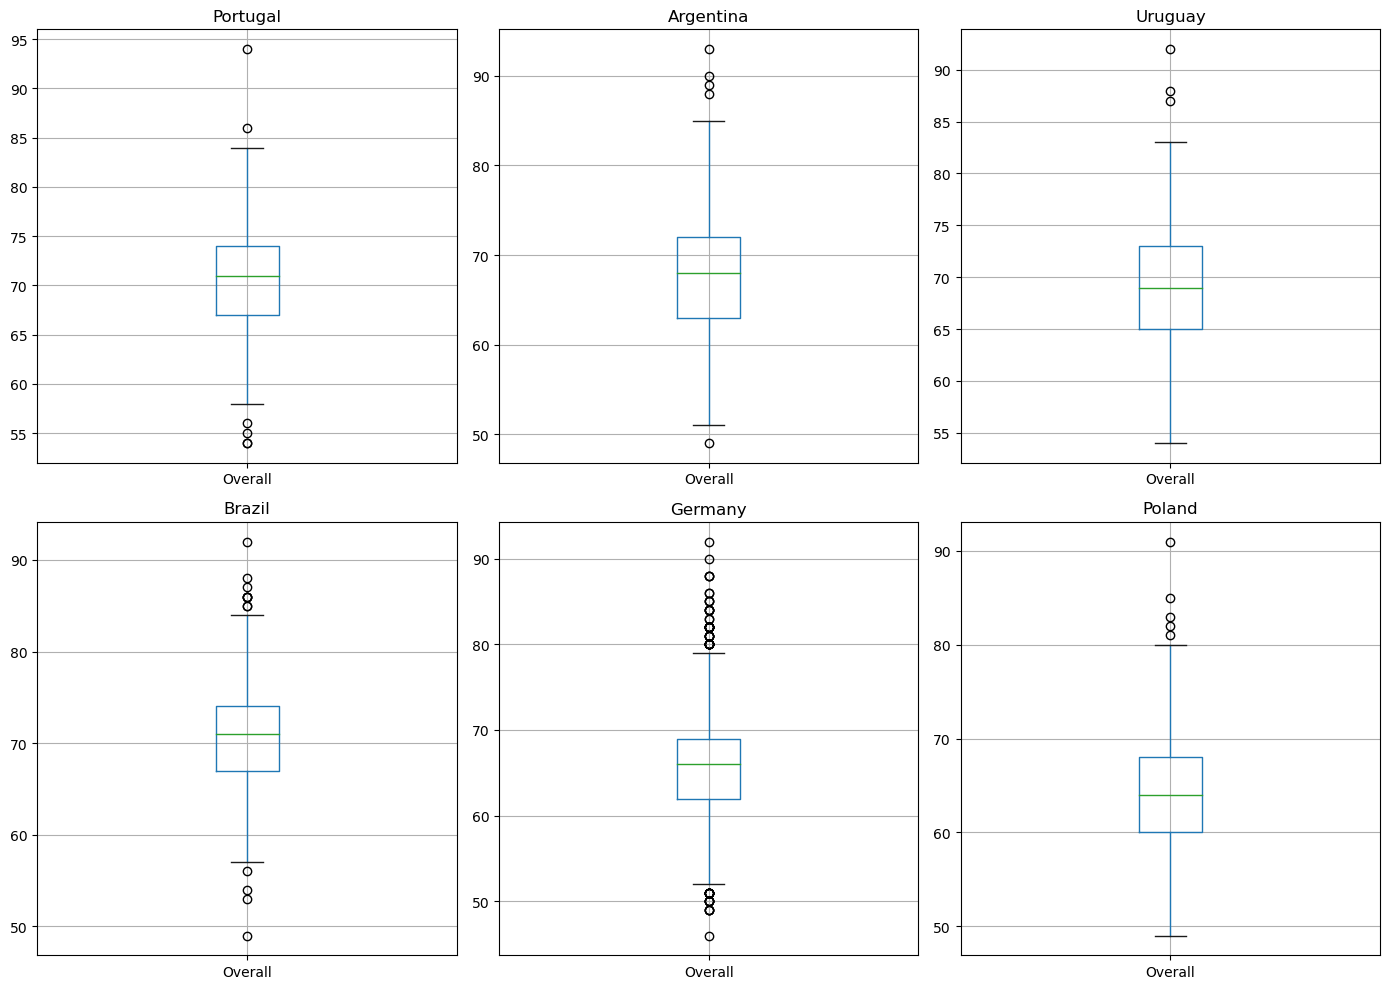

In [48]:
# Compare engine-sizes of  different  manufacturers
plt.style.use('default')
# sns.set(style = 'darkgrid')
plt.figure(figsize = (14,10))
plt.style.use('default')
car_name = ['Portugal', 'Argentina', 'Uruguay', 'Brazil', 'Germany', 'Poland']
n = 0


for i in car_name:
    
    n = n + 1
    plt.subplot(2,3,n)
    fifa_df[fifa_df['Nationality'] == i].boxplot(column = 'Overall', grid = True).set_title(i)

plt.tight_layout()
plt.show()

In [49]:
lst = list()
rt = list()
lst = fifa_df.groupby("Nationality")["Potential"].nlargest(6).sort_values(ascending=False).head(6)
rt = lst[:6]
rt

Nationality     
Portugal     0      94
Brazil       2      94
France       127    94
Italy        198    94
Slovenia     20     93
Argentina    1      93
Name: Potential, dtype: int64

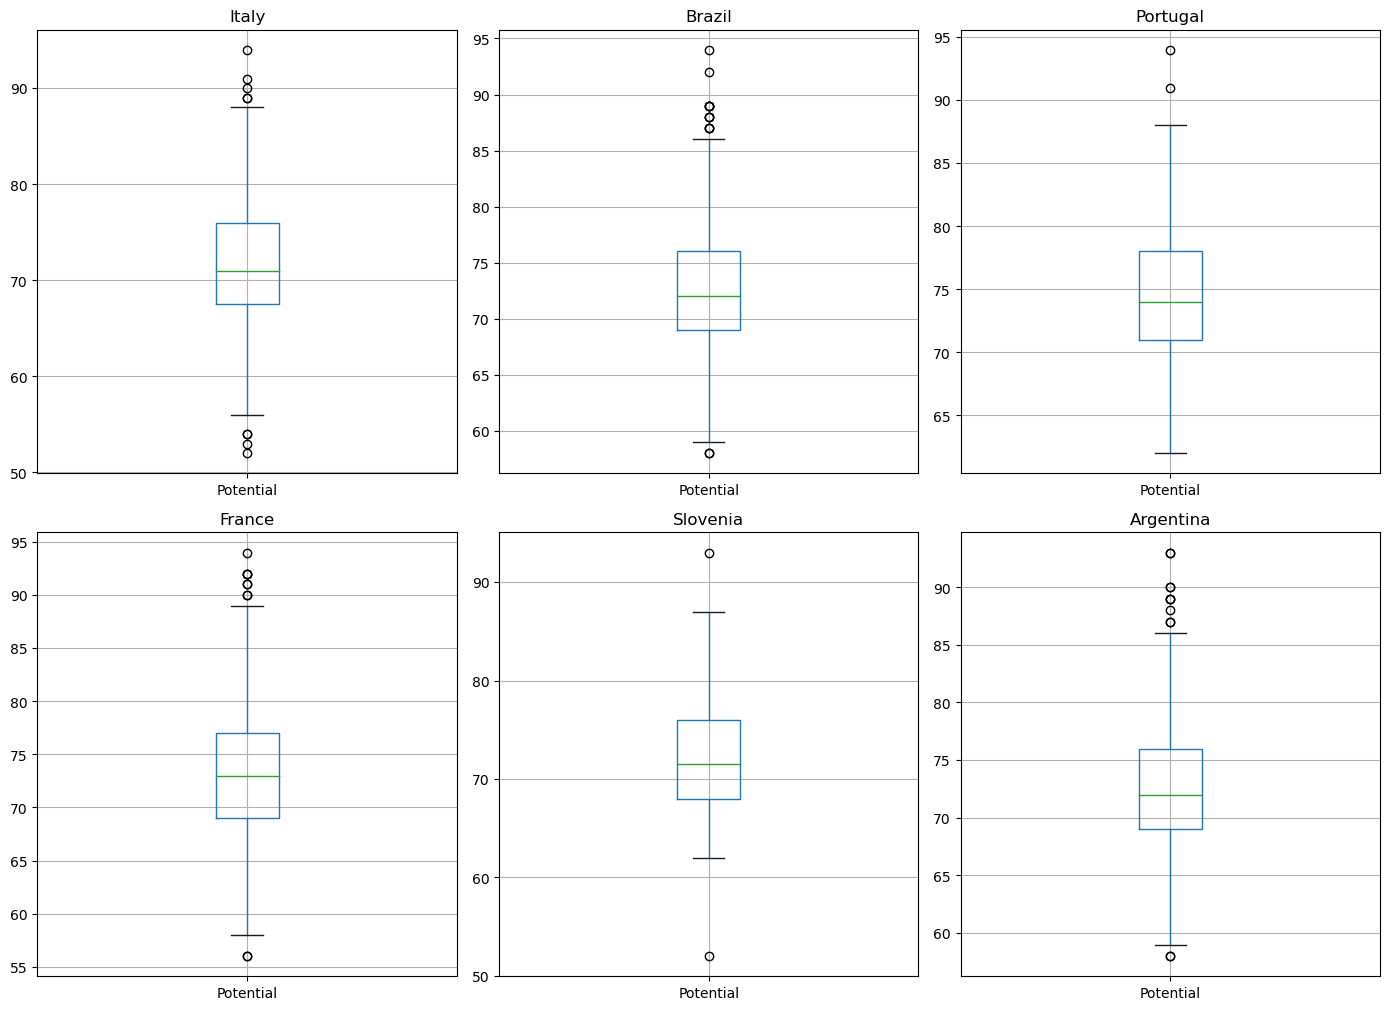

In [50]:
# Compare engine-sizes of  different  manufacturers
plt.style.use('default')
# sns.set(style = 'darkgrid')
plt.figure(figsize = (14,15))
plt.style.use('default')
car_name = ['Italy', 'Brazil', 'Portugal', 'France', 'Slovenia', 'Argentina']
n = 0

for i in car_name:
    
    n = n + 1
    plt.subplot(3,3,n)
    fifa_df[fifa_df['Nationality'] == i].boxplot(column = 'Potential', grid = True).set_title(i)

plt.tight_layout()
plt.show()

In [63]:
fifa_df.groupby("Nationality")["Ball_control"].nlargest(8).sort_values(ascending=False).head(8)


Nationality    
Argentina    1     95.0
Brazil       2     95.0
Spain        45    94.0
Argentina    19    93.0
Portugal     0     93.0
Belgium      7     92.0
Spain        22    92.0
Croatia      14    92.0
Name: Ball_control, dtype: float64

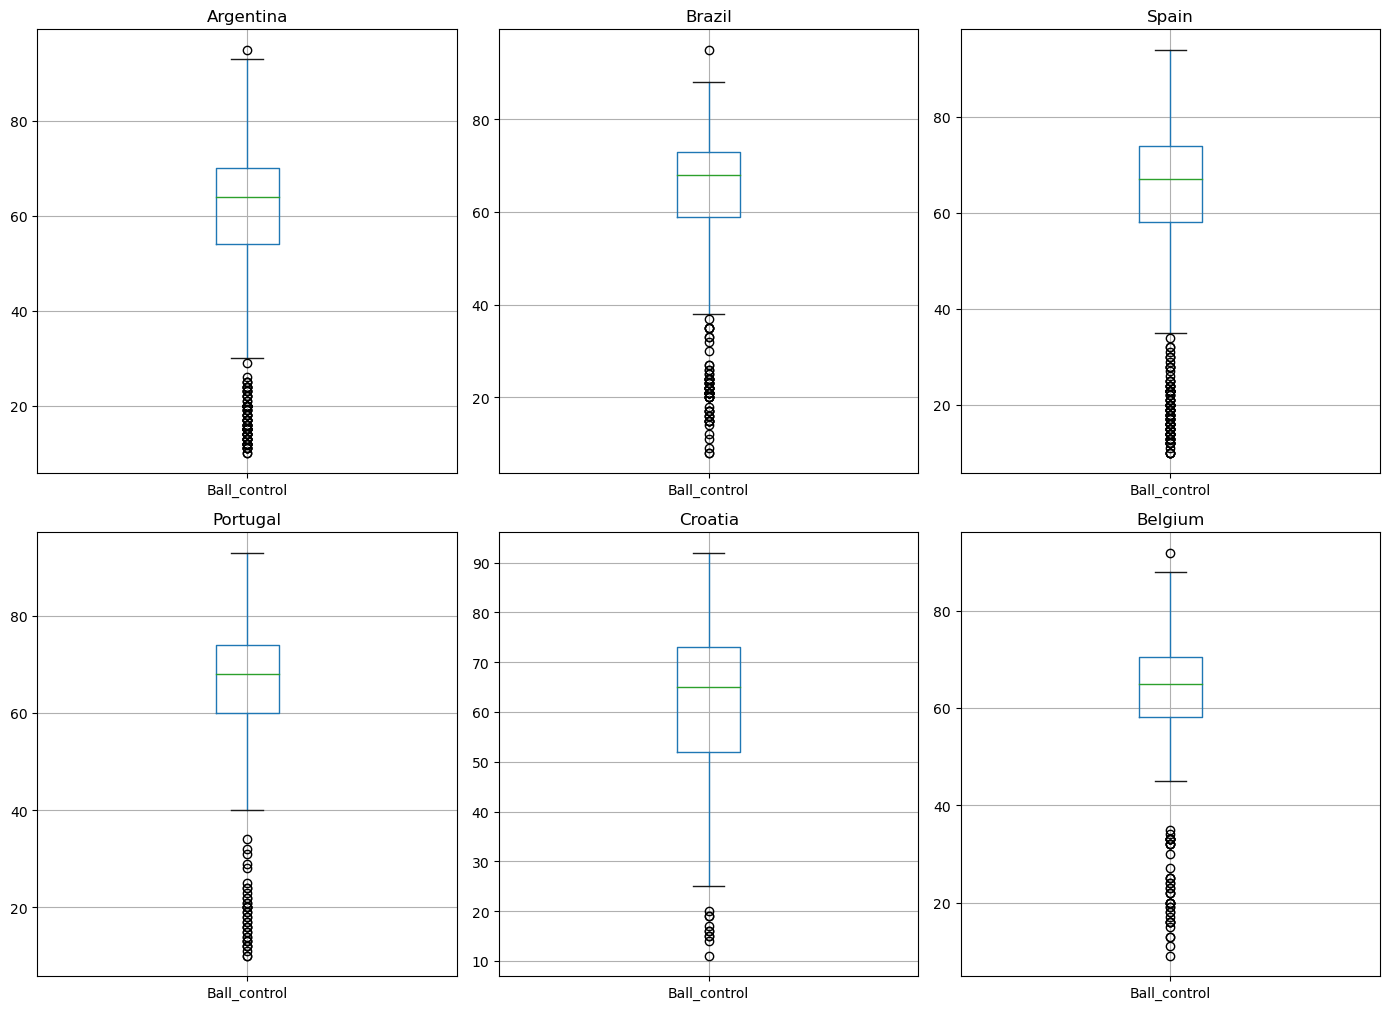

In [64]:
# Compare engine-sizes of  different  manufacturers
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (14,15))
plt.style.use('default')
car_name = ['Argentina', 'Brazil', 'Spain', 'Portugal', 'Croatia', 'Belgium']
n = 0

for i in car_name:
    
    n = n + 1
    plt.subplot(3,3,n)
    fifa_df[fifa_df['Nationality'] == i].boxplot(column = 'Ball_control', grid = True).set_title(i)

plt.tight_layout()
plt.show()

In [53]:
fifa_df.groupby("Nationality")["Balance"].nlargest(6).sort_values(ascending=False).head(6)


Nationality       
Brazil       559      96.0
England      5745     96.0
Argentina    930      95.0
Russia       15815    95.0
Italy        2502     95.0
Poland       6102     95.0
Name: Balance, dtype: float64

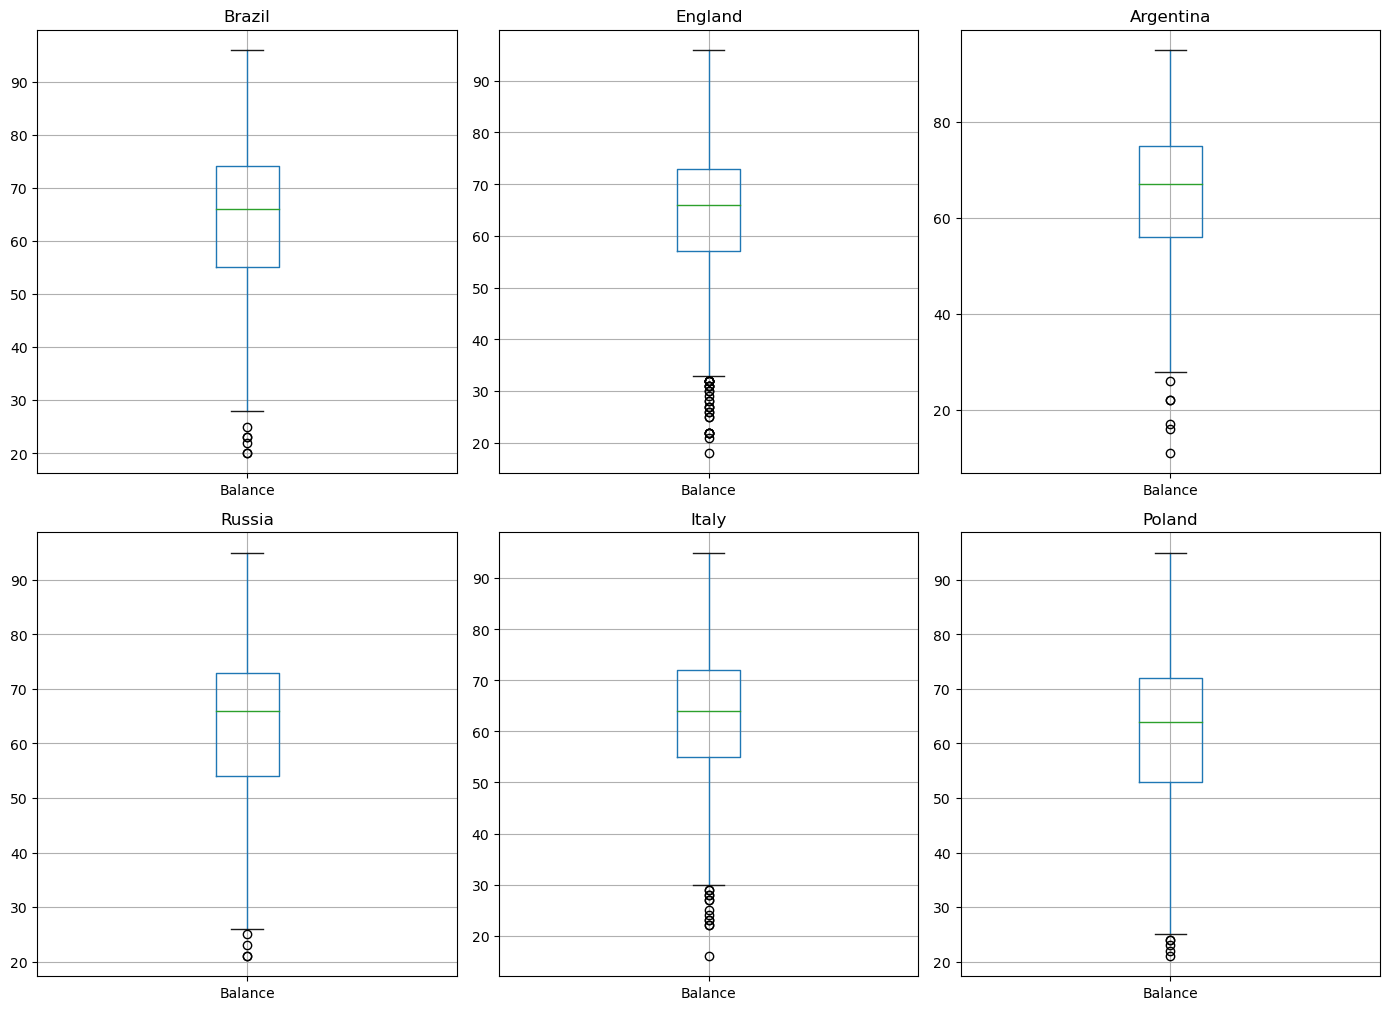

In [54]:
# Compare engine-sizes of  different  manufacturers
plt.style.use('default')
# sns.set(style = 'darkgrid')
plt.figure(figsize = (14,15))
plt.style.use('default')
car_name = ['Brazil', 'England', 'Argentina', 'Russia', 'Italy', 'Poland']
n = 0

for i in car_name:
    
    n = n + 1
    plt.subplot(3,3,n)
    fifa_df[fifa_df['Nationality'] == i].boxplot(column = 'Balance', grid = True).set_title(i)

plt.tight_layout()
plt.show()

In [55]:
fifa_df.groupby("Nationality")["Composure"].nlargest(7).sort_values(ascending=False).head(7)


Nationality    
Argentina    1     96.0
Portugal     0     95.0
Brazil       2     92.0
Spain        42    92.0
             65    92.0
Sweden       31    91.0
Germany      27    91.0
Name: Composure, dtype: float64

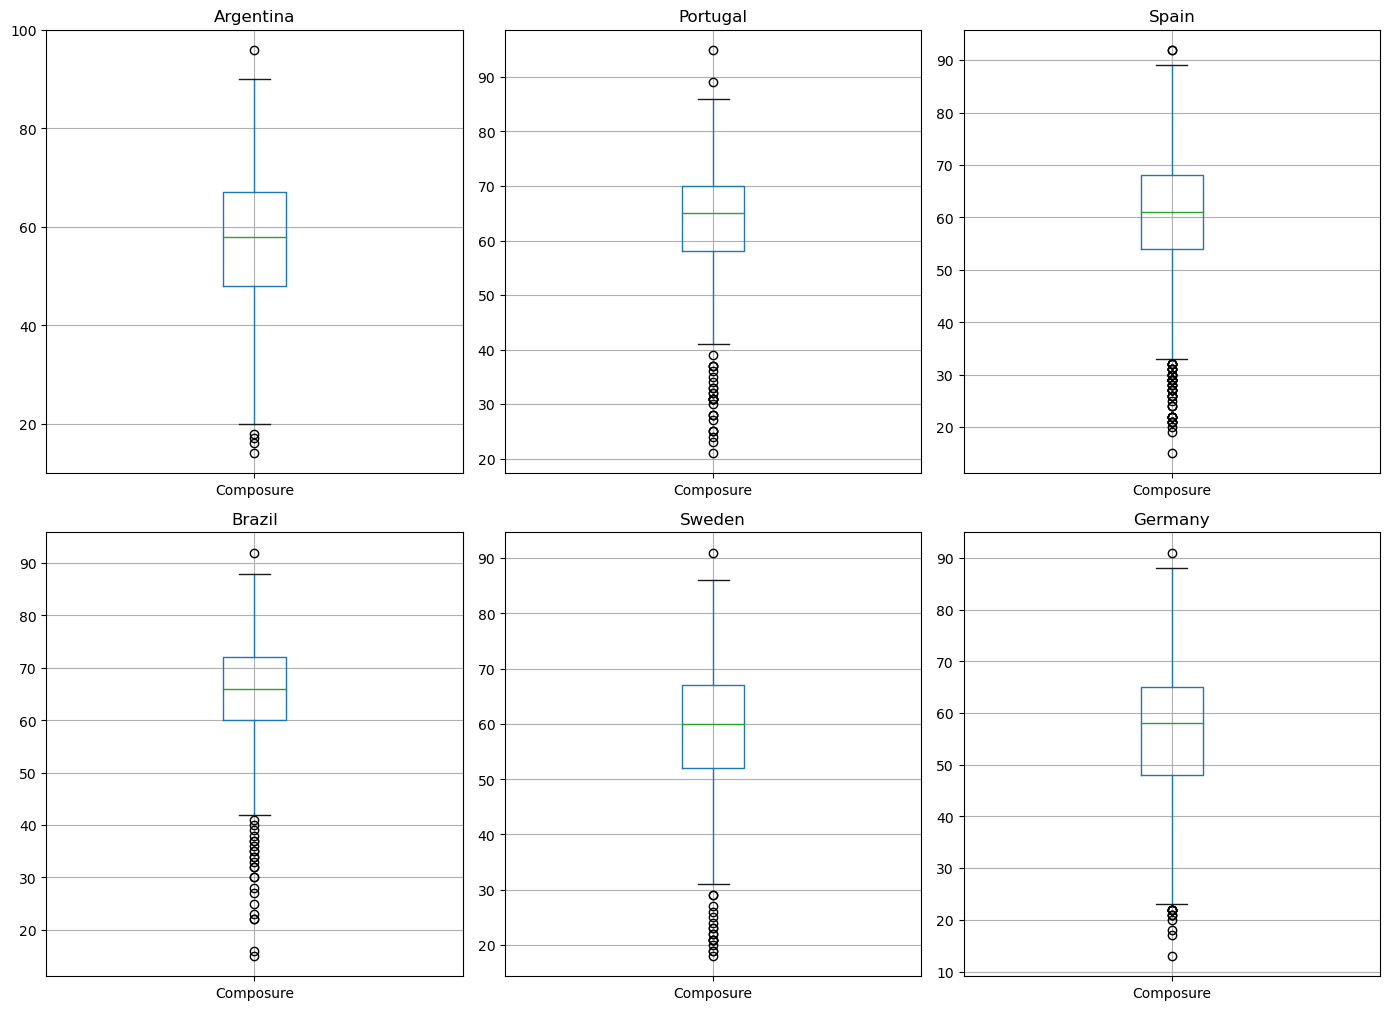

In [56]:
# Compare engine-sizes of  different  manufacturers
plt.style.use('default')
# sns.set(style = 'darkgrid')
plt.figure(figsize = (14,15))
plt.style.use('default')
car_name = ['Argentina', 'Portugal', 'Spain', 'Brazil', 'Sweden', 'Germany']
n = 0

for i in car_name:
    
    n = n + 1
    plt.subplot(3,3,n)
    fifa_df[fifa_df['Nationality'] == i].boxplot(column = 'Composure', grid = True).set_title(i)

plt.tight_layout()
plt.show()

In [57]:
fifa_df.groupby("Nationality")["Finishing"].nlargest(8).sort_values(ascending=False).head(8)


Nationality    
Argentina    1     95.0
Uruguay      3     94.0
Portugal     0     94.0
Poland       5     91.0
Argentina    9     91.0
England      46    90.0
Argentina    16    90.0
Brazil       2     89.0
Name: Finishing, dtype: float64

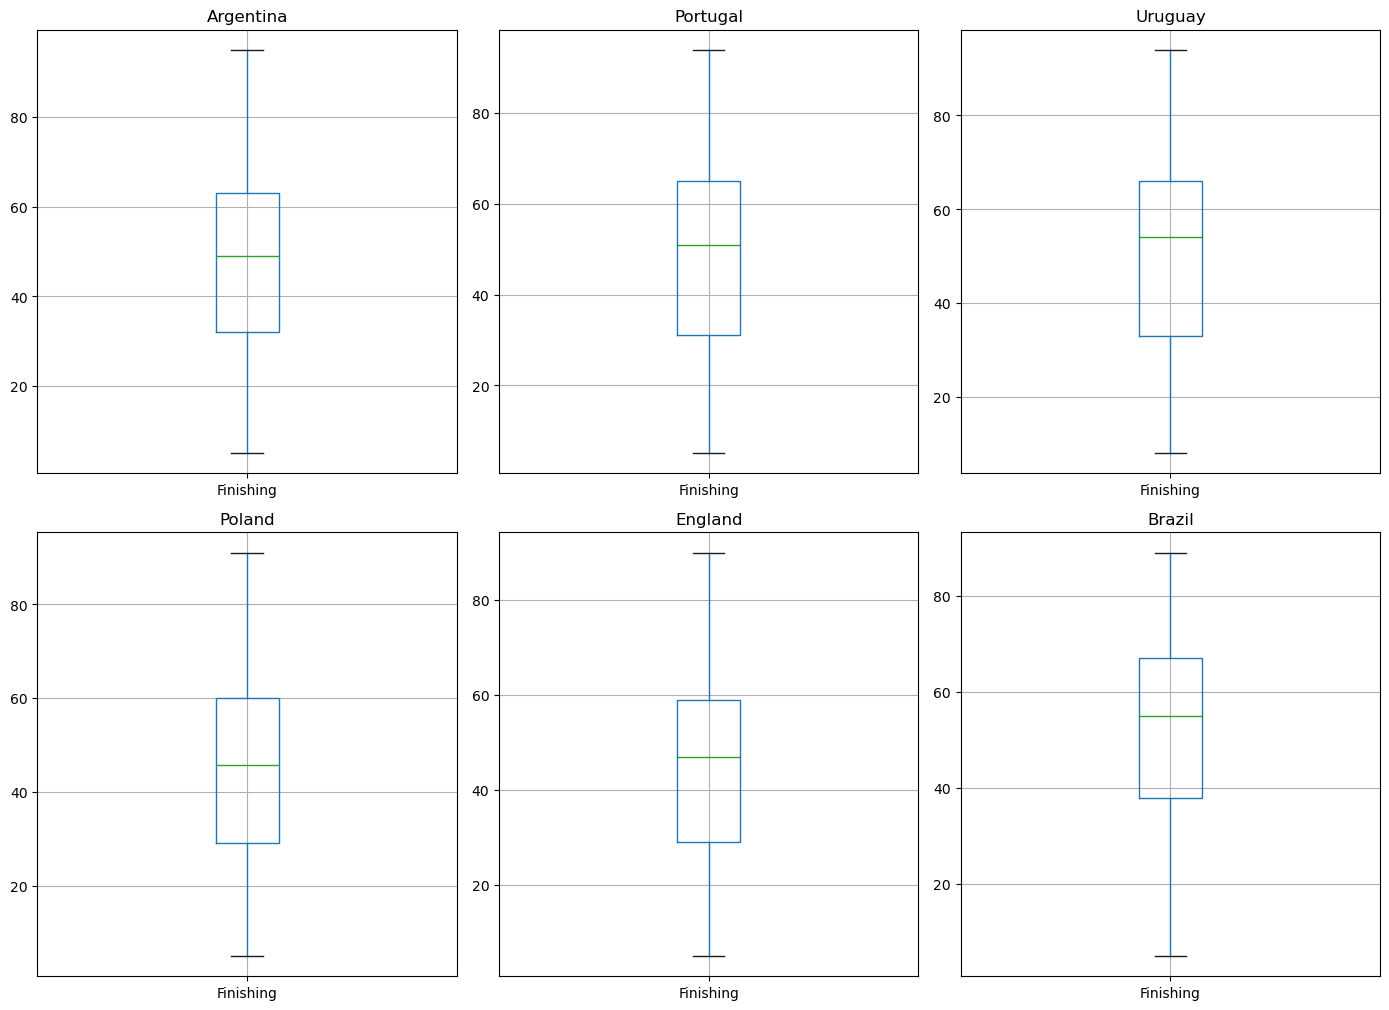

In [58]:
# Compare engine-sizes of  different  manufacturers
plt.style.use('default')
# sns.set(style = 'darkgrid')
plt.figure(figsize = (14,15))
plt.style.use('default')
car_name = ['Argentina', 'Portugal', 'Uruguay', 'Poland', 'England', 'Brazil']
n = 0

for i in car_name:
    
    n = n + 1
    plt.subplot(3,3,n)
    fifa_df[fifa_df['Nationality'] == i].boxplot(column = 'Finishing', grid = True).set_title(i)

plt.tight_layout()

plt.show()

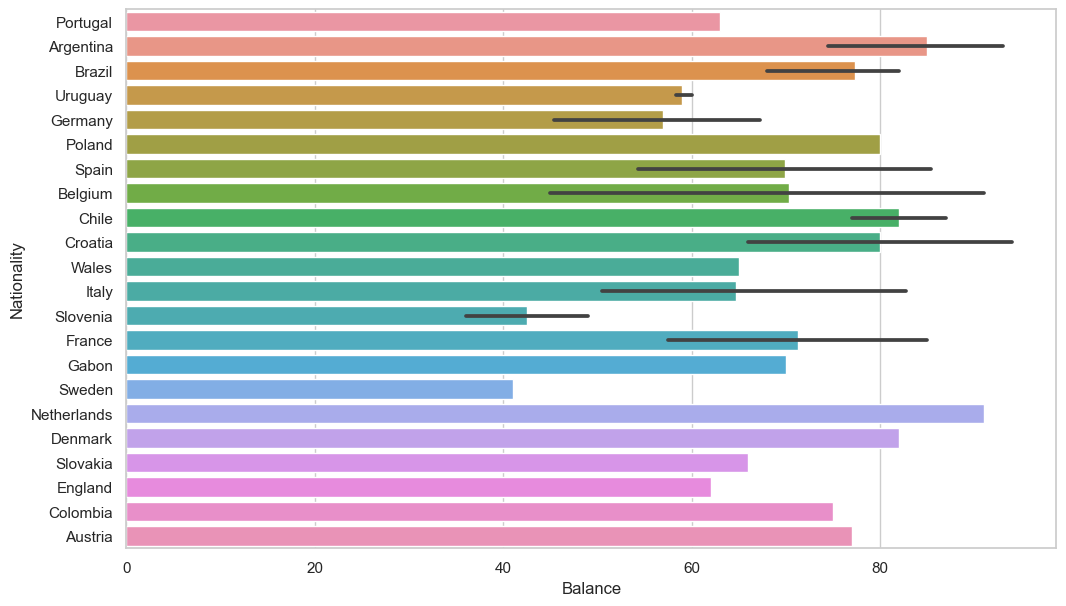

In [59]:

plt.style.use('default')
sns.set(style = 'whitegrid')
plt.figure(figsize=(12,7))

ax=sns.barplot(x = 'Balance', y = 'Nationality', data = fifa_df.iloc[:50])
plt.show()


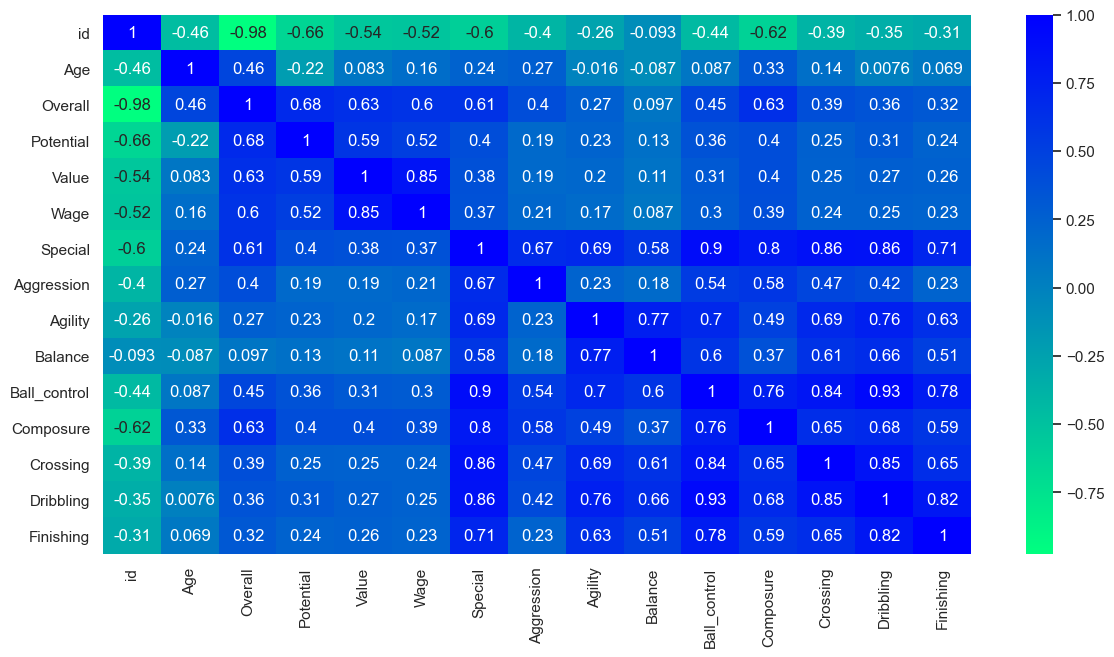

In [60]:
# Plotting a heat map
plt.figure(figsize=(14,7))
c= fifa_df.corr()
sns.heatmap(c,cmap = "winter_r",annot=True)
plt.show()

In [61]:
fifa_df.columns

Index(['id', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Aggression', 'Agility', 'Balance',
       'Ball_control', 'Composure', 'Crossing', 'Dribbling', 'Finishing'],
      dtype='object')

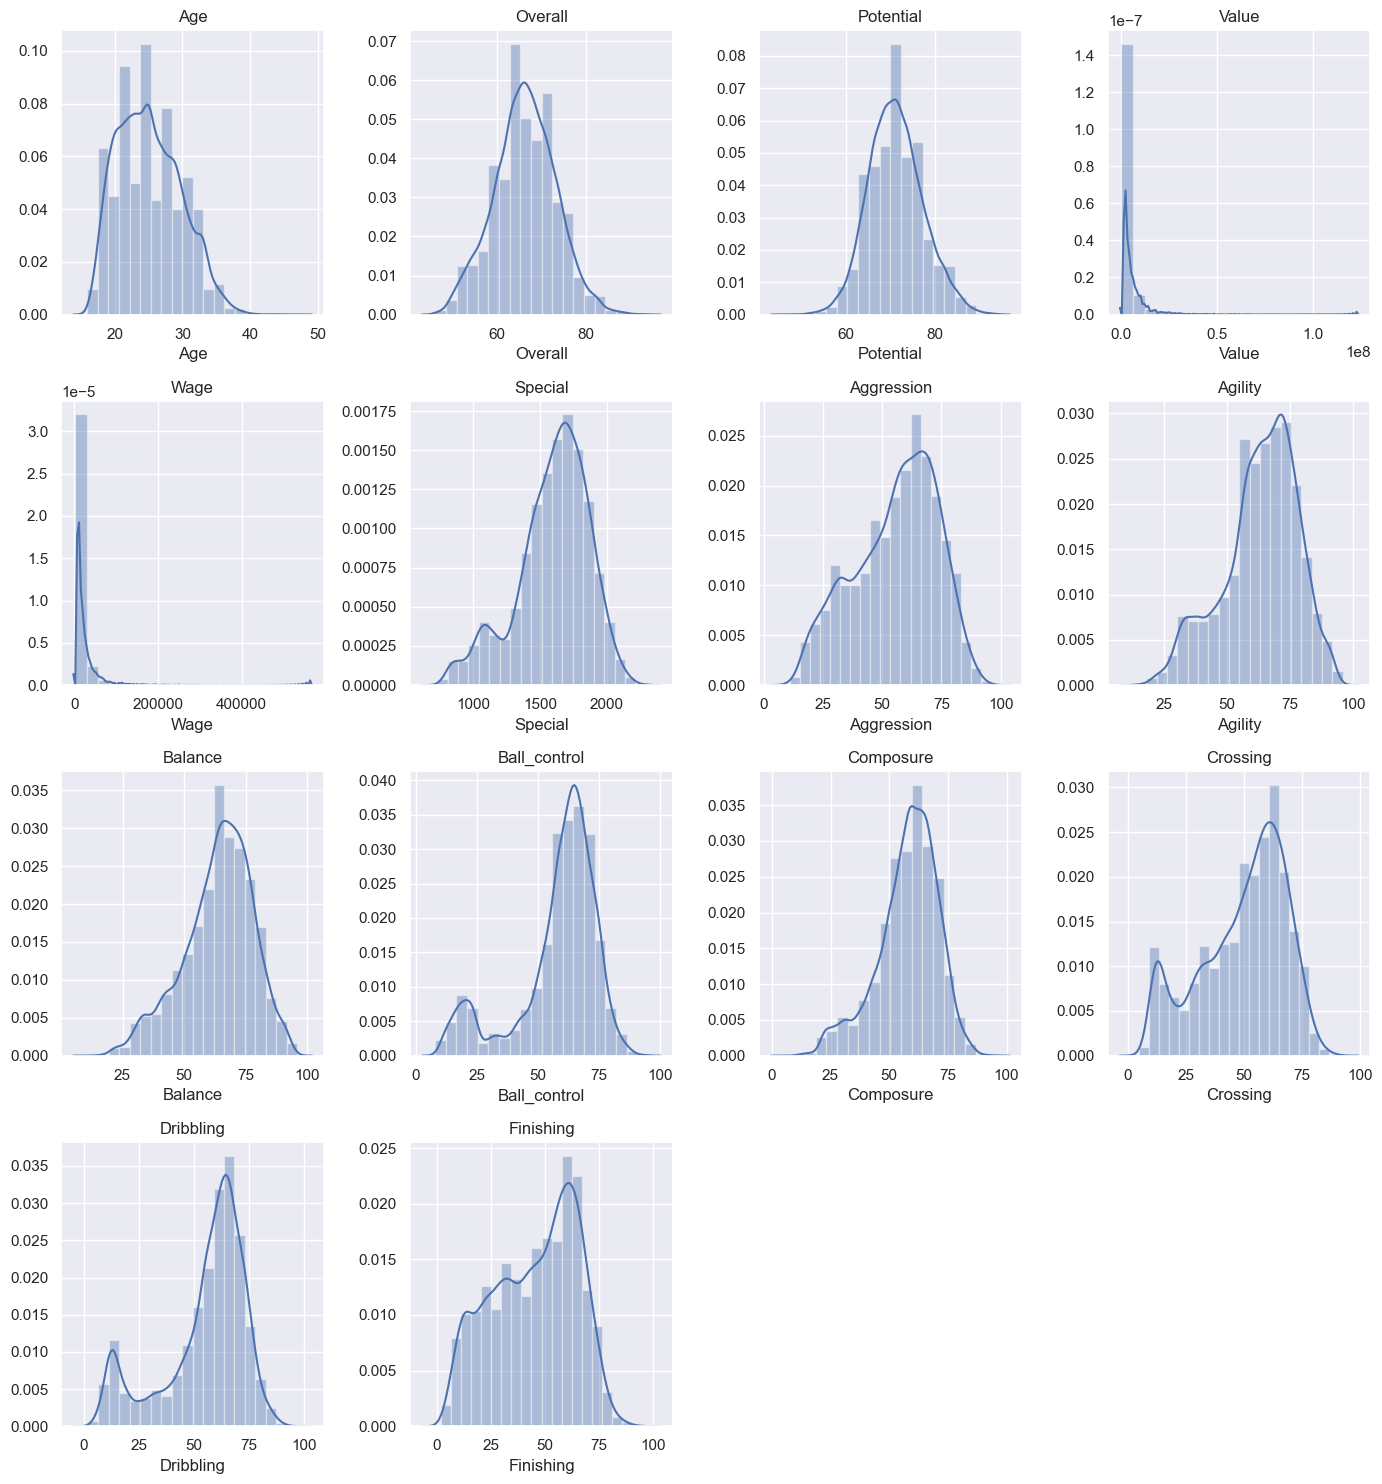

In [62]:
# Compare engine-sizes of  different  manufacturers


plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (14,15))

car_name = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Aggression', 'Agility', 'Balance', 'Ball_control',
            'Composure', 'Crossing', 'Dribbling', 'Finishing']
n = 0

for i in car_name:
    
    n = n + 1
    plt.subplot(4,4,n)
    sns.distplot(fifa_df[i], bins = 20, kde = True).set_title(i)

plt.tight_layout()
plt.show()

## CONCLUSION




The data analysis gives a small but important picture of the attributes that
play an essential role in making a top player. This analysis can be used by a
football scout to narrow down player search based on countries. The box
plots illustrate that the best players' overall ratings are not by coincidence
as their countries focus on proper player development. A scout will select
players based on performance and club’s budget. The player performance
has an effect on how much the club spends on the individual player.

## REFERENCES


[1] Sahoo, K., Samal, A.K., Pramanik, J. and Pani, S.K., ‘Exploratory Data Analysis using Python’, International Journal of Innovative Technology and Exploring Engineering (IJITEE).vol. 8, no. 12, pp 4728- 4735.